# SOK-1006 V23

## Forelesning 14 - Konsumentatferd

### 1. Fra konsumentens tilpasning til etterspørsel

Vi har regnet ut konsumentens tilpasning gitt preferanser, godepriser og budsjettet. Dette gir oss én optimal godekombinasjon. Vi kan spørre hvordan konsumentens tilpasning endrer seg når prisen på ett av godene endrer seg, og dermed utlede konsumentens etterspørsel. Dette er illustrert i Fig 8.1:
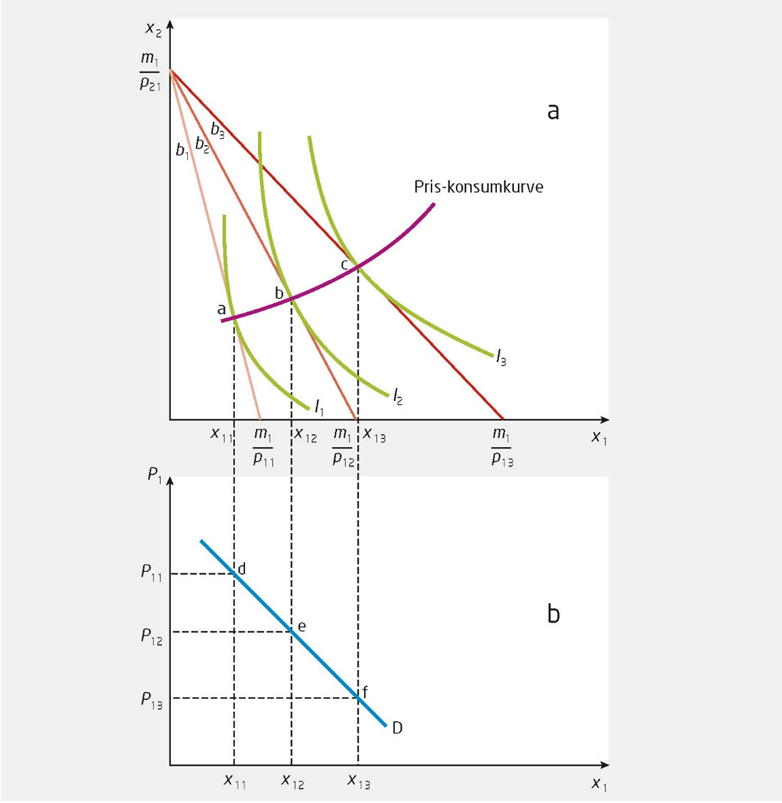

Her er etterspørsel gitt ved en rett linje, men det behøver ikke å være tilfellet. La oss illustrere med en konsument som har følgende preferanser over gode 1 og 2: $U=x_1^ax_2^b$. Priser og inntekt er gitt ved $p_1, p_2, m$. Vi har allerede funnet følgende (direkte) etterspørsel for denne konsumenten som 

$$x_1=\frac{am}{p_1(a+b)},x_2=\frac{bm}{p_2(a+b)}$$

Vi kan invertere for å tegne: $p_1=\frac{am}{x_1(a+b)}$.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

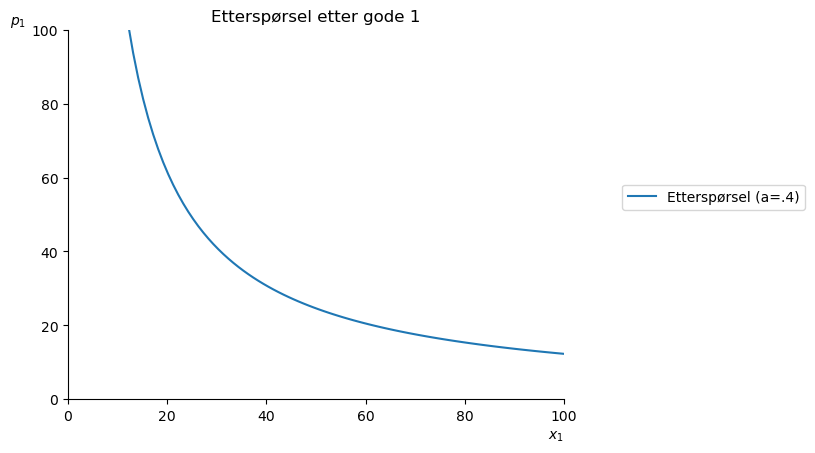

In [2]:
# definer inv ettersp

def inv_1(a,b,x1,m):
    return (a*m)/(x1*(a+b))

# lage en akse



x=np.linspace(0.001,100, 100)

def create_ax():
                fig, ax = plt.subplots()
                # ax.set_ylabel('$x_2$', loc='top', rotation=0)
                ax.set_xlabel('$x_1$', loc='right')
                ax.set(xlim=(0,100))
                ax.set(ylim=(0,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# vi kommer til å bruke forskjellige y akser så kommentert ut i funksjonen

# her har vi p_1 på y-aksen

ax.set_ylabel('$p_1$', loc='top', rotation=0)

# plott funksjonen for a= .4, b=.25, m=2000


ax.plot(x, inv_1(.4, .25, x, 2000), label='Etterspørsel (a=.4)')


# tittel
ax.set_title('Etterspørsel etter gode 1')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));



Vi kan se på hvordan etterspørsel endres når vi endrer $a$:

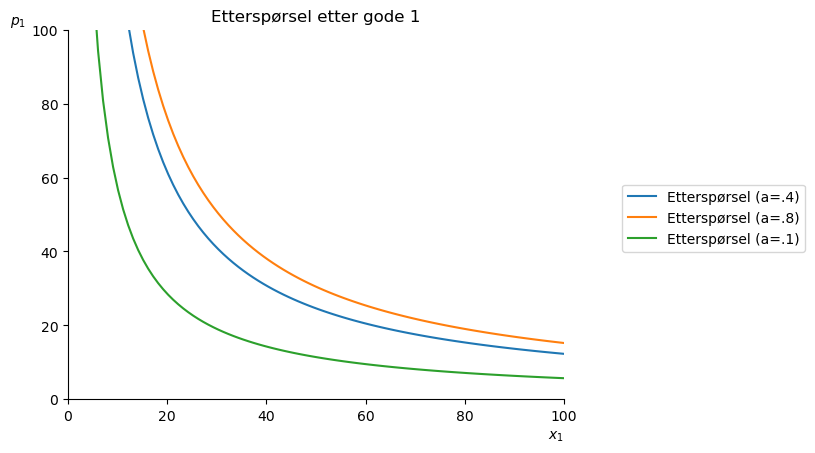

In [3]:
ax.plot(x, inv_1(.8, .25, x, 2000), label='Etterspørsel (a=.8)')
ax.plot(x, inv_1(.1, .25, x, 2000), label='Etterspørsel (a=.1)')
ax.legend(bbox_to_anchor=(1.5,0.6))
fig

Vi ser at etterspørsel er høyere jo sterke preferanse vi har for gode 1, men husk at vi fant en egenpriselastisitet på -1 i forelesning 13 for en konsument med Cobb-Douglas preferanser. Alle kurvene i figuren ovenfor har en elastisitet på -1.        

En endring i inntekt vil vanligvis føre til en økning i etterspørsel etter et gode (i samfunnsøkonomi er disse omtalt som normale goder). Dette er tilfellet dersom vi legger Cobb-Douglas preferanser til grunn også:

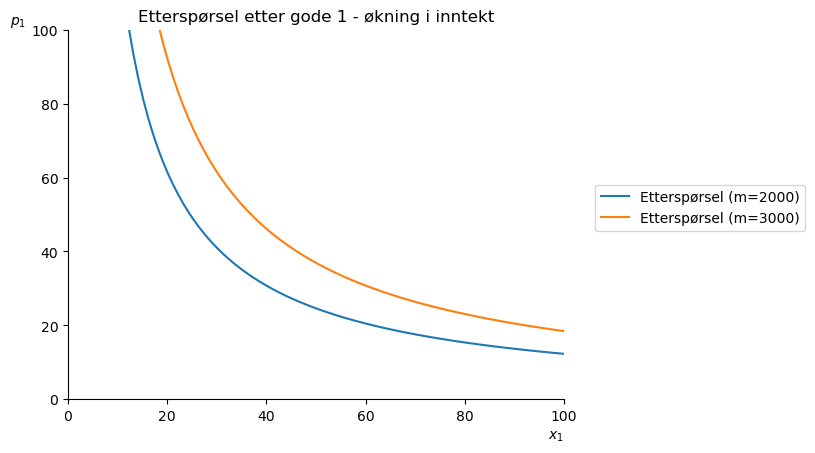

In [4]:
fig, ax = create_ax()

ax.set_ylabel('$p_1$', loc='top', rotation=0)
# plott funksjonen for a= .4, b=.25, m=2000 og m= 3000


ax.plot(x, inv_1(.4, .25, x, 2000), label='Etterspørsel (m=2000)')
ax.plot(x, inv_1(.4, .25, x, 3000), label='Etterspørsel (m=3000)')


# tittel
ax.set_title('Etterspørsel etter gode 1 - økning i inntekt')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));

Til hver pris øker etterspørsel når inntekt økes, men husk at begge disse kurvene har en inntektselastisitet på 1 i Cobb-Douglas tilfellet. Se Fig 8.6 som viser hvordan vi kan koble inntekt til etterspørsel gjennom en Engel-kurve.


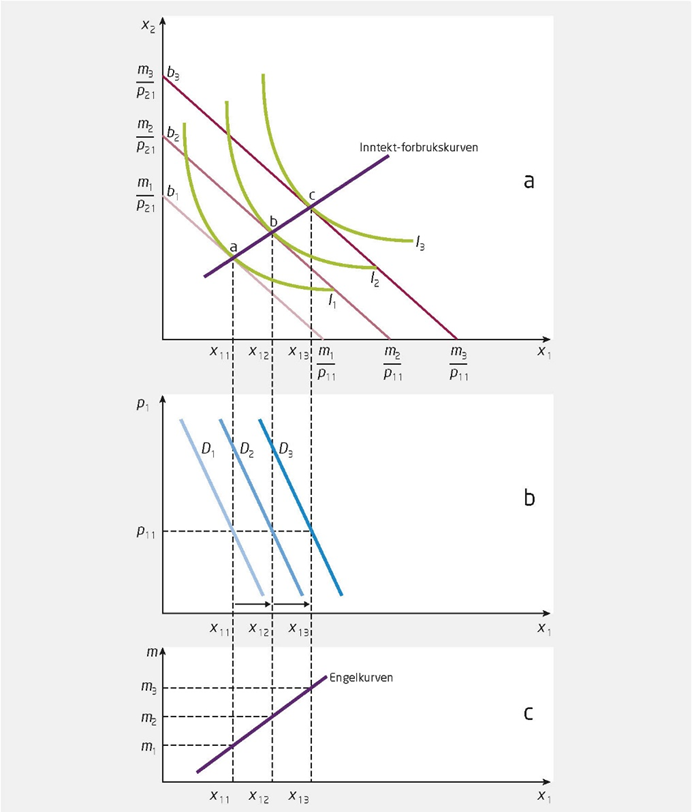

Vi har også sett at C-D preferanser er spesielt fordi endringer i prisen på gode 2 påvirker ikke etterspørsel etter gode 1. Godene er uavhengige i konsum. Se Fig 8.5
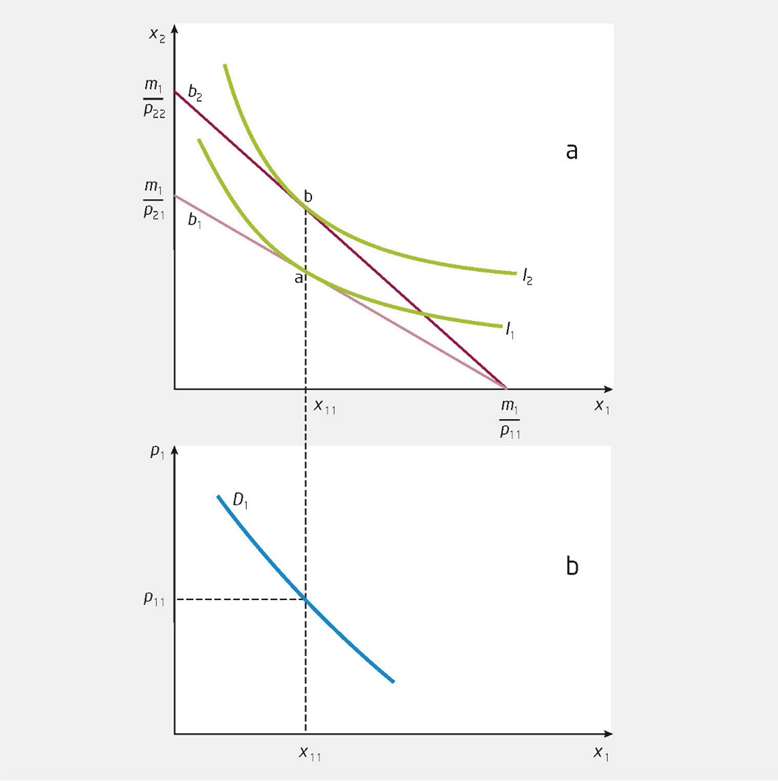

Dersom prisen på gode 2 faller, og etterspørsel etter gode 1 faller har vi med substitutter å gjøre (godene er alternative i etterspørsel - kjøtt og fisk for eksempel). Se Fig 8.3:
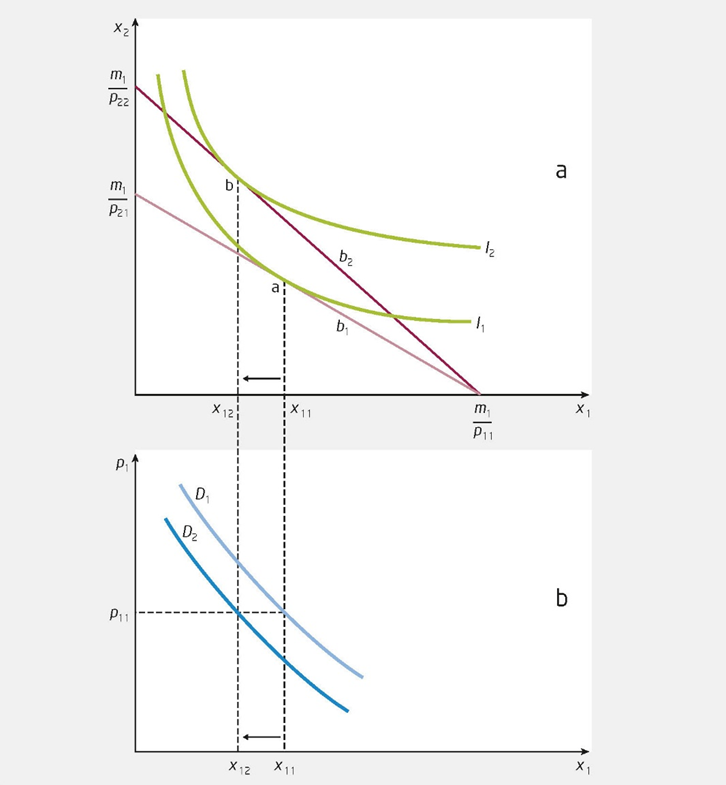

Godene er komplementære dersom en reduksjon i pris på gode 2 fører til en økning i etterspørsel etter gode 1 (ski og bindinger for eksempel). Fig 8.4
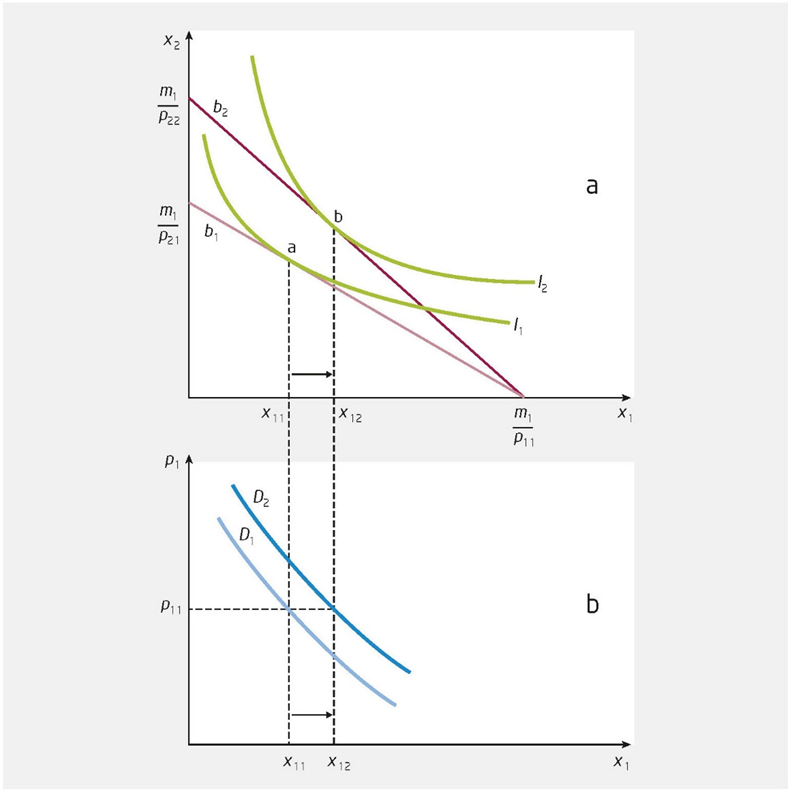

### 2. Estimat på pris- og inntektselastisiteter

I sin [masteroppgave fra 2018](https://github.com/uit-sok-1006-v23/uit-sok-1006-v23.github.io/blob/main/artikler/MartineHexeberg%20master.pdf) har Grøtt estimert priselastisiteter for noen matvarekategorier både for hele utvalget i datasettet, og også delt inn i forskjellige typer husholdninger.

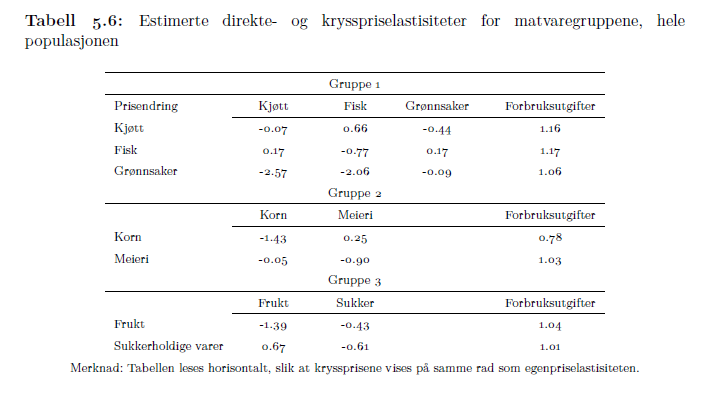

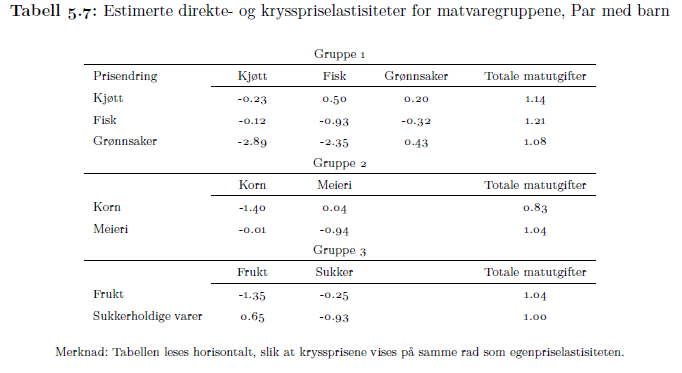

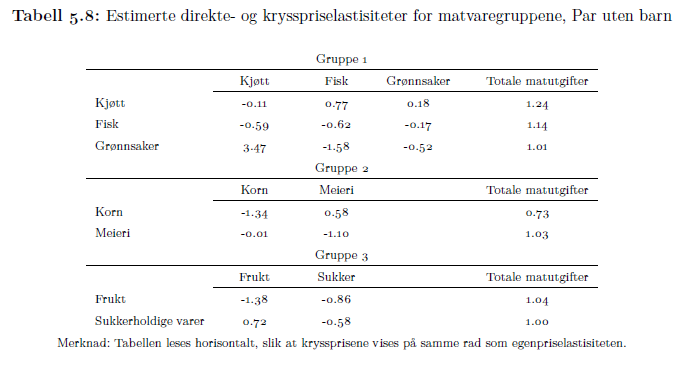

Vi ser at dette rimer ganske dårlig med Cobb-Douglas prefereranser!


[Jussila et al. (2012)](https://github.com/uit-sok-1006-v23/uit-sok-1006-v23.github.io/blob/main/artikler/LES%20Finland%202012.pdf) har estimert noen egenpris- og inntektselastisiteter for forskjellige varekategorier i Finland. De har tatt utgangspunkt i LES modellen (med en Stone-Geary nyttefunksjon i likning 3).

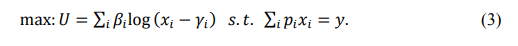

Med løsning

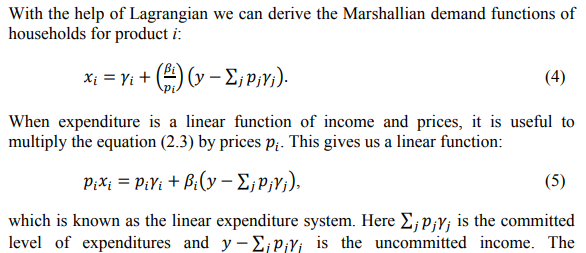

I likning 6, 7 og 8 regner Jussila uttrykk for egenpris-, krysspris og inntektselastisitetene:

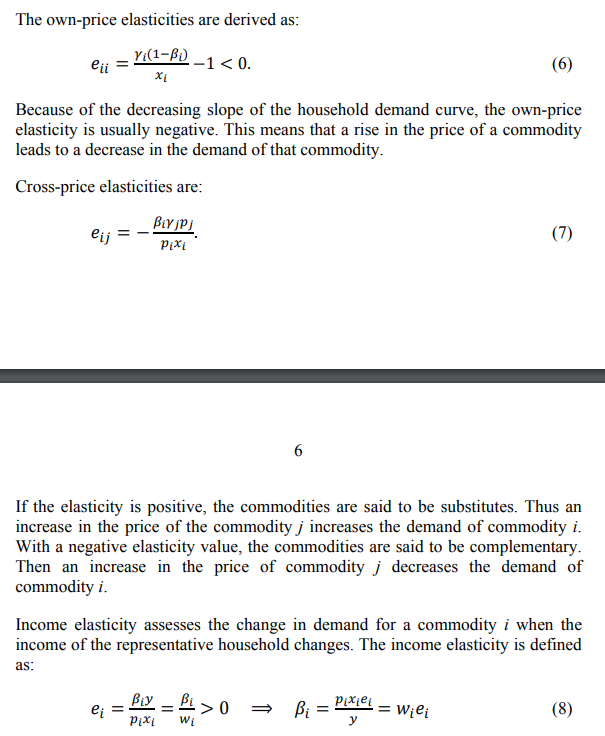

La oss regne på disse for to goder.



In [5]:
# definer symboler

bta_1, bta_2, gma_1, gma_2 = sp.symbols('\u03B2_1 \u03B2_2 \gamma_1 \gamma_2', real=True, positive=True)
x_1, x_2, p_1, p_2, m=sp.symbols("x_1 x_2 p_1 p_2 m", real=True, positive=True)

In [6]:
# etterspørsel etter gode 1

x_1_eq = gma_1 + (bta_1/p_1)*(m-p_1*gma_1-p_2*gma_2)

x_1_eq

\gamma_1 + β_1*(-\gamma_1*p_1 - \gamma_2*p_2 + m)/p_1

In [7]:
# regne egenpriselastisitet

el_x_1_p_1 = (sp.diff(x_1_eq, p_1))*(p_1/x_1_eq)
sp.simplify(el_x_1_p_1)

β_1*(\gamma_2*p_2 - m)/(\gamma_1*p_1 - β_1*(\gamma_1*p_1 + \gamma_2*p_2 - m))

Dette er egenpriselastisiteten. Jussila et al skriver dette som $\frac{\gamma_1(1-\beta_1)}{x_1}-1$ i likning (6). La oss sjekke at dette er det samme som det vi har funnet:

In [8]:
sp.simplify((el_x_1_p_1)-((gma_1*(1-bta_1)/x_1_eq)-1))

# hvis 0 er uttrykkene det samme

0

In [9]:
# krysspriselastisitet

el_x_1_p_2 = (sp.diff(x_1_eq, p_2))*p_2/x_1_eq
sp.simplify(el_x_1_p_2)

-\gamma_2*p_2*β_1/(\gamma_1*p_1 - β_1*(\gamma_1*p_1 + \gamma_2*p_2 - m))

In [10]:
# samme som Jussila likning (7)?
sp.simplify((el_x_1_p_2)-(-bta_1*gma_2*p_2/(p_1*x_1_eq)))

# hvis 0 samme uttrykk

0

In [11]:
# inntektselastisitet
el_x_1_m = (sp.diff(x_1_eq, m))*m/x_1_eq
sp.simplify(el_x_1_m)

m*β_1/(\gamma_1*p_1 - β_1*(\gamma_1*p_1 + \gamma_2*p_2 - m))

In [12]:
# samme som Jussila likning (8)?
sp.simplify((el_x_1_m)-(bta_1*m)/(p_1*x_1_eq))

0

Estimatene til Jussila et al. (2012):

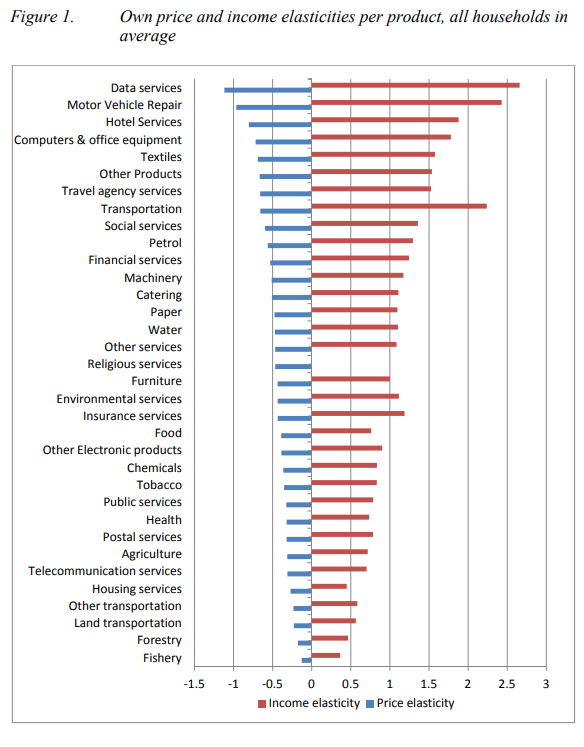

**Oppgave**        
a) Gitt disse resultatene synes du at Stone-Geary er en bedre måte å modellere preferanser på enn Cobb-Douglas? Hvorfor/hvorfor ikke?      
b) Hva viser $\beta_1, \beta_2$ og hvorfor er det rimelig at de summerer til 1? (Se på likning (5) i Jussila, og tenk hva som skjer når inntekten øker med 1kr).      
c) Tegn Engelkurven til gode 1 og forklar hva den viser. Tegn deretter tre figurer som viser hvordan Engelkurven er påvirket av endringer i $(\gamma_1, \gamma_2), (\beta_1, \beta_2), (p_1, p_2)$. Forklar dine funn.


### 3. Substitusjons- og inntektseffekten av en prisendring
En prisendring har to effekter: (i) substitusjonseffekten som vanligvis gjør at konsumenten bytter bort fra en vare som er blitt relativt dyrere, (ii) inntektseffekten som følger av en endring i reell kjøpekraft pga en prisendring. Fig 8.8 viser dekomponeringen for en økning i prisen på gode 1. ab viser substitusjonseffekten som reduserer etterspørsel etter vare 1 som er blitt relativt dyrere, og øker etterspørsel etter 2. bc viser inntektseffekten hvor etterspørsel etter begge goder faller pga av konsumentens realinntekt har falt. I sum (ac) er etterspørsel etter begge godene blitt redusert. For gode 1 går begge effektene i negativ retning (lavere etterspørsel). For gode 2 er substitusjonseffekten positiv, men inntektseffekten er sterkere i negativ retning.

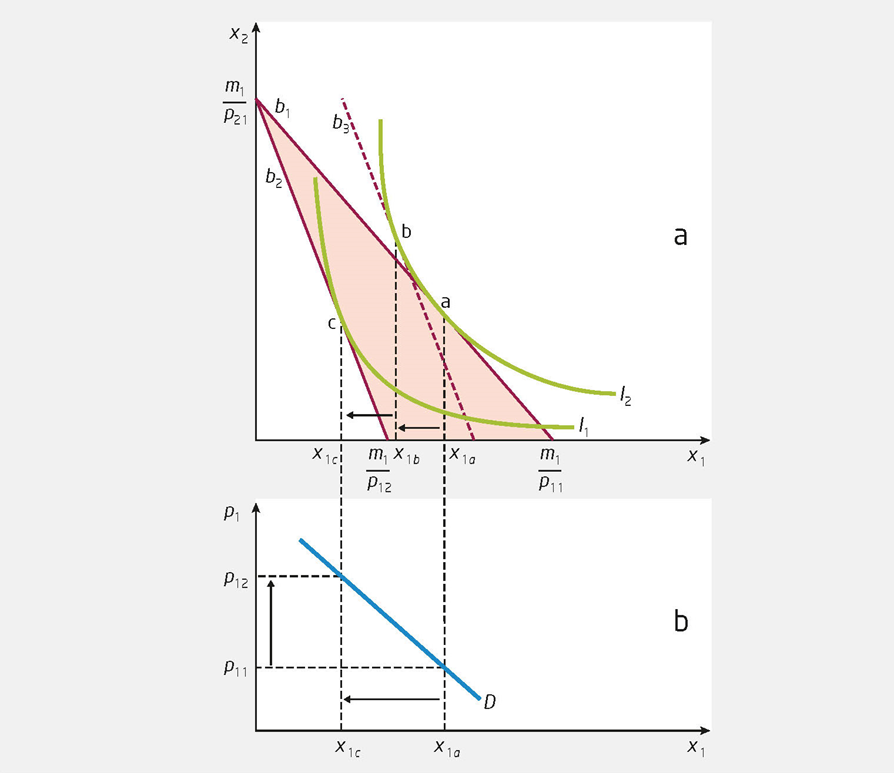

### 4. Oppskrift for å tegne og beregne inntekts og substitusjonseffekter

Vi ser på en husholdning som har en Stone-Geary nyttefunksjon

\begin{equation}
   U(x_1, x_2) = \beta_1 ln (x_1-\gamma_1) + \beta_2 ln (x_2-\gamma_2) 
\end{equation}

hvor $\beta_1+\beta_2=1$, og $\gamma_1>0, \gamma_2>0$.       


La oss anta at prisen på gode 1 øker.

##### Steg 1
Før prisendringen: beregn optimal verdier på $x_1, x_2$ og finn nyttenivået som konsumenten oppnår. Tegn tilpasningen i en figur (budsjettbetingelse, oppnådd nytte og tilpasningspunkt).

##### Steg 2
Prisen på gode 1 økes. Finn de nye verdiene på $x_1, x_2$ og finn det nye nyttenivået. Tegn den nye budsjettlinjen, oppnådd nytte og tilpasningen inn i figuren. Beregn den totale endringen i etterspørsel etter gode 1 og 2. 

##### Steg 3
Gitt den nye prisen på gode 1 finn hvor mye inntekt konsumenten trenger for å oppnå nyttenivået fra Steg 1. Med denne fiktive budsjettlinjen finn konsumentens tilpasning og tegn denne i figuren.

##### Steg 4
Dekomponer den totale endringen fra Steg 2 i en substitusjonseffekt (langs indifferenskurven fra steg 1) og en inntektseffekt (fra indifferenskurven fra steg 1 til indifferenskurven fra steg 2)

#### 4.1 Et eksempel

La oss anta at $\gamma_1=\gamma_2=1, \beta_1=\beta_2=0.5, p_1=p_2=2, m=100$ i utgangspunktet, så økes prisen på gode 1 til 10.   
   

In [13]:
# nytte
nytte_sg = bta_1*sp.log(x_1-gma_1) + (1-bta_1)*sp.log(x_2-gma_2)

# steg 1
# vi har definert x_1_eq som etterspørsel etter gode 1

# gode 2 (se forelesning 13)

x_2_eq = gma_2 + (bta_2/p_2)*(m-p_1*gma_1-p_2*gma_2)

# budsjett x_2 = m/p_2 - p_1x_1/p_2

def budsjett(M, x_1, p_1, p_2):
    return M/p_2 - (p_1*x_1/p_2)


# oppnåd nytte i likevekt

V = nytte_sg.subs([(x_1, x_1_eq), (x_2, x_2_eq)])
V



β_1*log(β_1*(-\gamma_1*p_1 - \gamma_2*p_2 + m)/p_1) + (1 - β_1)*log(β_2*(-\gamma_1*p_1 - \gamma_2*p_2 + m)/p_2)

In [14]:
# lag funksjon for indifferenskurve
U_0=sp.symbols('U_0', real = True, positive=True)

ind_k = sp.solve(nytte_sg-U_0, x_2)[0]
display(ind_k)



\gamma_2 + exp((-U_0 + β_1*log(-\gamma_1 + x_1))/(β_1 - 1))

In [15]:
# lag funksjon
def ind_k_fn(bta_1,gma_1,gma_2,x_1,U_0):
    return gma_2 + np.exp((bta_1*np.log(x_1-gma_1)-U_0)/(bta_1-1))

In [16]:
# sett inn verdier

x_1_eq_num = float(x_1_eq.subs([(bta_1, 0.5), (gma_1, 1), (gma_2, 1), (m, 100), (p_1, 2), (p_2, 2)]))
x_2_eq_num = float(x_2_eq.subs([(bta_2, 0.5), (gma_1, 1), (gma_2, 1), (m, 100), (p_1, 2), (p_2, 2)]))
nytte_sg_num = float(V.subs([(bta_1, 0.5),(bta_2, 0.5), (gma_1, 1), (gma_2, 1), (m, 100), (p_1, 2), (p_2, 2)]))
display(x_1_eq_num)
display(x_2_eq_num)
display(nytte_sg_num)

25.0

25.0

3.1780538303479458

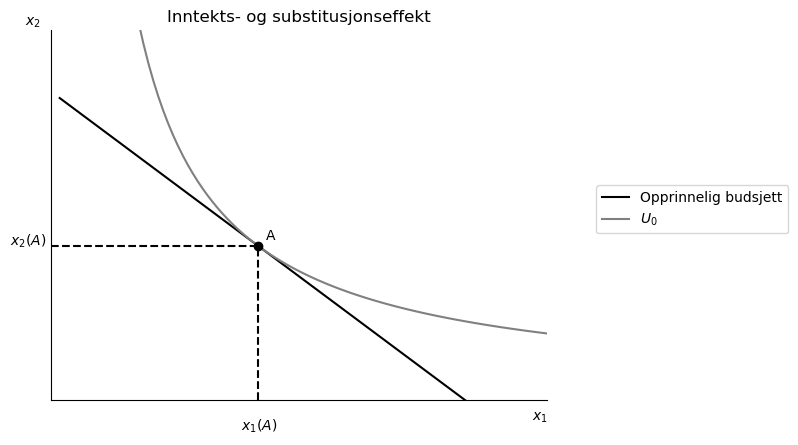

In [17]:
# tegne steg 1

# lag X som sikrer x-gma>0
X = np.linspace (1.01,60,100)


fig1, ax = create_ax()
ax.set(xlim=(0,60))
ax.set(ylim=(0,60))

# ta bort tall på aksene
ax.set_xticks([], [])
ax.set_yticks([], [])

ax.set_ylabel('$x_2$', loc='top', rotation=0)


ax.plot(X, budsjett(100, X, 2, 2), color='black', label='Opprinnelig budsjett')
ax.plot(X, ind_k_fn(.5,1,1,X,nytte_sg_num), color='grey',label='$U_0$')

ax.vlines(x_1_eq_num, 0, x_2_eq_num, ls='dashed', color='black')
ax.hlines(x_2_eq_num, 0, x_1_eq_num, ls='dashed', color='black')

ax.annotate('$x_1(A)$', (x_1_eq_num-2, -5), annotation_clip=False)
ax.annotate('$x_2(A)$', (-5, x_2_eq_num), annotation_clip=False)
ax.annotate('A', (x_1_eq_num+1,x_2_eq_num+1))
ax.plot(x_1_eq_num, x_2_eq_num , marker='o', color='black')



# tittel
ax.set_title('Inntekts- og substitusjonseffekt')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));

In [18]:
# Steg 2

# beregne nye verdier


x_1_eq_ny = float(x_1_eq.subs([(bta_1, 0.5), (gma_1, 1), (gma_2, 1), (m, 100), (p_1, 10), (p_2, 2)]))
x_2_eq_ny = float(x_2_eq.subs([(bta_2, 0.5), (gma_1, 1), (gma_2, 1), (m, 100), (p_1, 10), (p_2, 2)]))
nytte_sg_ny = float(V.subs([(bta_1, 0.5),(bta_2, 0.5), (gma_1, 1), (gma_2, 1), (m, 100), (p_1, 10), (p_2, 2)]))


display(x_1_eq_ny)
display(x_2_eq_ny)
display(nytte_sg_ny)

5.4

23.0

2.286323497141266

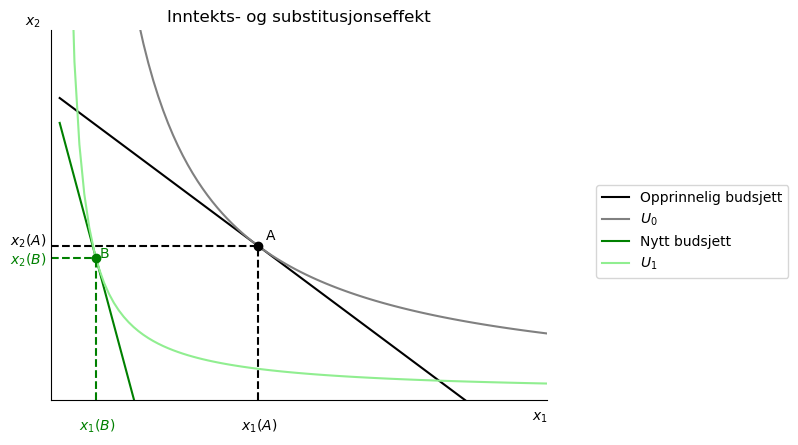

In [19]:
# legg nye verdier på tegningen

ax.plot(X, budsjett(100, X, 10, 2), color='green', label='Nytt budsjett')
ax.plot(X, ind_k_fn(.5,1,1,X,nytte_sg_ny), color='lightgreen', label='$U_1$')

ax.vlines(x_1_eq_ny, 0, x_2_eq_ny, ls='dashed', color='green')
ax.hlines(x_2_eq_ny, 0, x_1_eq_ny, ls='dashed', color='green')

ax.annotate('$x_1(B)$', (x_1_eq_ny-2, -5), color='green', annotation_clip=False)
ax.annotate('$x_2(B)$', (-5, x_2_eq_ny-1), color= 'green', annotation_clip=False)
ax.annotate('B', (x_1_eq_ny+.5,x_2_eq_ny), color='green')
ax.plot(x_1_eq_ny, x_2_eq_ny , marker='o', color='green')

ax.legend(bbox_to_anchor=(1.5,0.6))
fig1

In [20]:
# steg 3

# beregn fiktiv inntekt

# finn først hvordan oppnådd nytte er avhengig av inntekt gitt nye priser

V_m = V.subs([(bta_1, 0.5),(bta_2, 0.5), (gma_1, 1), (gma_2, 1), (p_1, 10), (p_2, 2)])
V_m



0.5*log(0.05*m - 0.6) + 0.5*log(0.25*m - 3.0)

In [21]:
# hvilken verdi for m gir nytte_sg_num?

#fikt_m = sp.solve(V_m-nytte_sg_num, m)[0]
#fikt_m

# sp.solve fant ikke løsning

# kunne løse V_m=3

sp.solve(V_m-3, m)[0]


191.650503699318

In [22]:
# da vil den eksakte løsningen ligge over dette
# ta dette som utgangspunkt og løs ved simulering
# vi begynner på m= 192 og sjekker om V_m-nytte_sg_num<0
# hvis tilfelle, øker vi m med 0.01 og sjekker på nytt
# skriv ut første m som gjør at V_m-nytte_sg_num går fra negativ til positiv
# dvs verdien av m som gir V_m-nytte_sg_num circa 0

# bruk i som indeks

i=192
while (V_m.subs(m,i)-nytte_sg_num<0):
    i=i+.01
else:
    print(i)

226.66999999996847


In [26]:
# en mer nøyaktig løsning er å bruke numeric solve

fikt_m = sp.nsolve(V_m-nytte_sg_num, m, 192)
fikt_m

226.662525839980

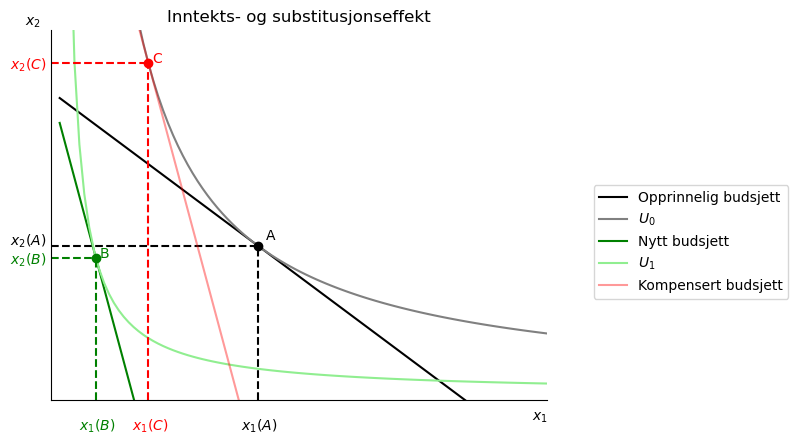

In [27]:
# fiktiv inntekt er 226.67
# med denne inntekten og de nye prisene kan konsumenten få samme nytte til de nye prisene som i utgangspunktet.

# verdier for godene med denne inntekten
x_1_eq_komp = float(x_1_eq.subs([(bta_1, 0.5), (gma_1, 1), (gma_2, 1), (m, fikt_m), (p_1, 10), (p_2, 2)]))
x_2_eq_komp = float(x_2_eq.subs([(bta_2, 0.5), (gma_1, 1), (gma_2, 1), (m, fikt_m), (p_1, 10), (p_2, 2)]))

# tegne budsjett med denne inntekten "kompensert budsjett"

ax.plot(X, budsjett(226.67, X, 10, 2), color='red', alpha=.4, label='Kompensert budsjett')

ax.vlines(x_1_eq_komp, 0, x_2_eq_komp, ls='dashed', color='red')
ax.hlines(x_2_eq_komp, 0, x_1_eq_komp, ls='dashed', color='red')

ax.annotate('$x_1(C)$', (x_1_eq_komp-2, -5), color='red', annotation_clip=False)
ax.annotate('$x_2(C)$', (-5, x_2_eq_komp-1), color= 'red', annotation_clip=False)
ax.annotate('C', (x_1_eq_komp+.5,x_2_eq_komp), color='red')
ax.plot(x_1_eq_komp, x_2_eq_komp , marker='o', color='red')

ax.legend(bbox_to_anchor=(1.5,0.6))
fig1

Da har vi den totale effekten som går fra A til B. Etterspørselen etter begge godene reduseres.       
Substitusjonseffekten er fra A til C: negativ for gode 1 som er blitt relativt dyrere, og positiv for gode 2.        
Inntektseffekten er negativ for begge godene (C til B).        

Vi ser at både inntekts- og substitusjonseffekten er negativ for gode 1, mens den positive substitusjonseffekten for gode 2 er mindre enn den negative inntektseffekten slik at den totale effekten er negativ.

In [ ]:
# vi oppsummerer i en tabell

from IPython.display import Markdown

tbl=f"""
|    Gode     | Substitusjonseffekt|  Inntektseffekt  |  Total effekt  |
| :----------------------| :------------------| :------------------------| :--------------|
| 1 | ${np.round(float(x_1_eq_komp-x_1_eq_num),2)}$|${np.round(float(x_1_eq_ny-x_1_eq_komp),2)}$| ${np.round(float(x_1_eq_ny-x_1_eq_num),2)}$     |
| 2 |${np.round(float(x_2_eq_komp-x_2_eq_num),2)}$ | ${np.round(float(x_2_eq_ny-x_2_eq_komp),2)}$ |  ${np.round(float(x_2_eq_ny-x_2_eq_num),2)}$    |

"""
display(Markdown(tbl))

In [ ]:
# generell tabell

from IPython.display import Markdown

gen=f"""
|    Gode     | Substitusjonseffekt|  Inntektseffekt <div style="width:100px">  |  Total effekt <div style="width:100px"> |
| :----------------------| :------------------| :------------------------| :--------------|
| 1 | $x_1(C)-x_1(A)$|$x_1(B)-x_1(C))$| $x_1(B)-x_1(A)$     |
| 2 |$x_2(C)-x_2(A)$ | $x_2(B)-x_2(C)$ |  $x_2(B)-x_2(A)$    |

"""
display(Markdown(gen))

**Oppgave**       


a) I eksempelet faller etterspørselen etter gode 2 når $p_1$ øker. Dette betyr at den negative inntektseffekten er større enn den positive substitusjonseffekten. Dette viser seg å alltid være tilfelle i LES modellen med $\gamma_i$ positiv for alle goder. Som [Chang og Fawson (1994)](https://digitalcommons.usu.edu/cgi/viewcontent.cgi?article=1036&context=eri) skriver: "When the $\gamma_i$ are positive, the cross price effects are negative, a fact implying that the income effects are stronger than the substitution effects". Forklar.           
b) I Stone-Geary formuleringen kan $\gamma_i$ være negative tall. Hva er konsekvensen av dette for krysspriseffekten?       
c) Tenk at konsumenten i det forrige eksempelet har en Cobb-Douglas nyttefunksjon $U(x_1,x_2)=x_1^{.4}x_2^{.25}$. Hvordan ser inntekts- og substitusjonseffektene ut nå? Sammenlikn med Stone-Geary tilfellet.   